In [ ]:
import pandas as pd
import numpy as np
import math
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.style.use('seaborn-whitegrid')  # Setting figure style
from matplotlib import colors as mcolors


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_clean = pd.read_csv('/content/drive/MyDrive/UFC_clean.csv')
df_clean.head()

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR_pct,B_SIG_STR_pct,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_PASS,B_PASS,R_REV,B_REV,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner,win_by_Decision,win_by_KO,win_by_Submission,win_by_Other,R_SIG_STR._att,R_SIG_STR._landed,B_SIG_STR._att,B_SIG_STR._landed,R_TOTAL_STR._att,R_TOTAL_STR._landed,B_TOTAL_STR._att,B_TOTAL_STR._landed,R_TD_att,R_TD_landed,B_TD_att,B_TD_landed,R_HEAD_att,R_HEAD_landed,B_HEAD_att,B_HEAD_landed,R_BODY_att,R_BODY_landed,B_BODY_att,B_BODY_landed,R_LEG_att,R_LEG_landed,B_LEG_att,B_LEG_landed,R_DISTANCE_att,R_DISTANCE_landed,B_DISTANCE_att,B_DISTANCE_landed,R_CLINCH_att,R_CLINCH_landed,B_CLINCH_att,B_CLINCH_landed,R_GROUND_att,R_GROUND_landed,B_GROUND_att,B_GROUND_landed,weight_class,No_of_rounds,total_time_fought(seconds),total_time_fought(minutes),R_Stance,R_DOB,R_Height,R_Reach,R_Weight,B_Stance,B_DOB,B_Height,B_Reach,B_Weight,R_age,B_age,fight_year
0,Henry Cejudo,Marlon Moraes,0,0,0.52,0.47,0.25,0.00,1,0,1,0,0,0,KO/TKO,3,291,5 Rnd (5-5-5-5-5),Marc Goddard,2019-06-08,"Chicago, Illinois, USA",UFC Bantamweight Title Bout,Henry Cejudo,False,True,False,False,171,90,119,57,182,99,121,59,4,1,2,0,150,73,89,35,16,13,8,7,5,4,22,15,118,45,116,54,23,19,2,2,30,26,1,1,Bantamweight,5,891,14.850000,Orthodox,1987-02-09,162.56,162.56,135.0,Orthodox,1988-04-26,167.64,170.18,135.0,32.0,31.0,2019
1,Valentina Shevchenko,Jessica Eye,1,0,0.72,0.16,1.00,0.00,1,0,3,0,0,0,KO/TKO,2,26,5 Rnd (5-5-5-5-5),Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",UFC Women's Flyweight Title Bout,Valentina Shevchenko,False,True,False,False,11,8,12,2,40,37,52,42,2,2,0,0,5,4,7,0,6,4,2,0,0,0,3,2,8,5,12,2,2,2,0,0,1,1,0,0,Women's Flyweight,5,326,5.433333,Southpaw,1988-03-07,165.10,167.64,125.0,Orthodox,1986-07-27,167.64,167.64,125.0,31.0,33.0,2019
2,Tony Ferguson,Donald Cerrone,0,0,0.52,0.36,0.00,1.00,0,0,0,0,0,0,TKO - Doctor's Stoppage,2,300,3 Rnd (5-5-5),Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Lightweight Bout,Tony Ferguson,False,True,False,False,200,104,185,68,200,104,185,68,0,0,1,1,144,65,152,43,37,25,23,15,19,14,10,10,198,103,184,68,2,1,1,0,0,0,0,0,Lightweight,3,600,10.000000,Orthodox,1984-02-12,180.34,193.04,155.0,Orthodox,1983-03-29,185.42,185.42,155.0,35.0,36.0,2019
3,Jimmie Rivera,Petr Yan,0,2,0.38,0.29,0.00,0.33,0,0,0,1,0,0,Decision - Unanimous,3,300,3 Rnd (5-5-5),Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Bantamweight Bout,Petr Yan,True,False,False,False,192,73,189,56,195,76,192,58,3,0,3,1,145,42,166,40,24,15,19,13,23,16,4,3,173,60,167,42,15,9,12,10,4,4,10,4,Bantamweight,3,900,15.000000,Orthodox,1989-06-29,162.56,172.72,135.0,Switch,1993-02-11,170.18,170.18,135.0,30.0,26.0,2019
4,Tai Tuivasa,Blagoy Ivanov,0,1,0.44,0.59,0.00,1.00,0,0,0,0,0,0,Decision - Unanimous,3,300,3 Rnd (5-5-5),Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Heavyweight Bout,Blagoy Ivanov,True,False,False,False,144,64,123,73,146,66,131,81,0,0,2,2,114,39,114,65,7,6,8,7,23,19,1,1,126,50,111,62,18,14,6,5,0,0,6,6,Heavyweight,3,900,15.000000,Southpaw,1993-03-16,187.96,190.50,264.0,Southpaw,1986-10-09,180.34,185.42,250.0,26.0,33.0,2019


## Begining

[Text(0, 0.5, 'weight_class'),
 Text(0.5, 0, 'no'),
 Text(0.5, 1.0, 'Number of fights by the weight class')]

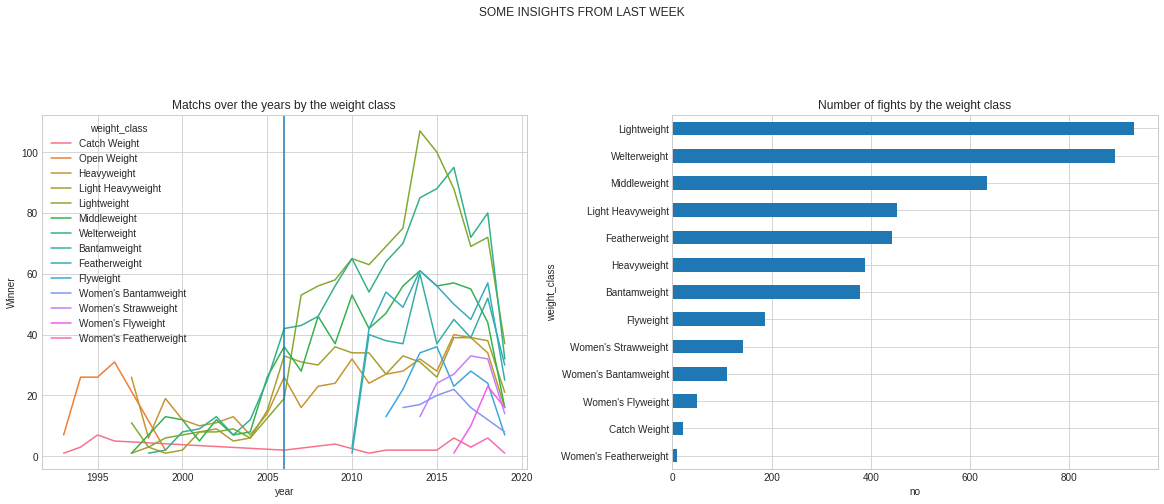

In [ ]:
fig = plt.figure(constrained_layout=False, figsize=(20, 15))
fig.suptitle('SOME INSIGHTS FROM LAST WEEK')
gs = fig.add_gridspec(nrows=2, ncols=2, wspace=0.3, hspace=0.3)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])

matchs = df_clean.groupby(['fight_year','weight_class']).count()['Winner'].reset_index()
# matchs = matchs[matchs['weight_class'].isin(['Lightweight','Welterweight','Middleweight','Featherweight','Light Heavyweight'])]
palette = sns.color_palette(n_colors=14)
sns.lineplot(data=matchs, y="Winner", x="fight_year", hue="weight_class", ax = ax1)
ax1.set(title = 'Matchs over the years by the weight class' , xlabel = 'year')
ax1.axvline(x = 2006)

df_clean[df_clean['fight_year'] >= 2006].groupby('weight_class').count()['Winner'].sort_values().plot(kind = 'barh', ax =ax2)
ax2.set(title = 'Number of fights by the weight class' , xlabel = 'no', ylabel = 'weight_class')



Continuing with last week's insights, this week will explore more thoroughly the successful combat tactics, preparing for the upcoming training plan for the 5 fighters in the 5 hottest weight classes:


*  Weight class : 'Lightweight','Welterweight','Middleweight','Featherweight','Light Heavyweight'
*   Data from 2006 - T6/2019
*   Championship Fights At 3 Rounds: '3 Rnd (5-5-5)'












In [ ]:
weight_select = ['Lightweight','Welterweight','Middleweight','Featherweight','Light Heavyweight']
df = df_clean[df_clean['fight_year']>= 2006]
df = df_clean[df_clean['weight_class'].isin(weight_select)]
df = df[df['Format'].isin(['3 Rnd (5-5-5)'])]

df.describe()

,R_KD,B_KD,R_SIG_STR_pct,B_SIG_STR_pct,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_PASS,B_PASS,R_REV,B_REV,last_round,last_round_time,R_SIG_STR._att,R_SIG_STR._landed,B_SIG_STR._att,B_SIG_STR._landed,R_TOTAL_STR._att,R_TOTAL_STR._landed,B_TOTAL_STR._att,B_TOTAL_STR._landed,R_TD_att,R_TD_landed,B_TD_att,B_TD_landed,R_HEAD_att,R_HEAD_landed,B_HEAD_att,B_HEAD_landed,R_BODY_att,R_BODY_landed,B_BODY_att,B_BODY_landed,R_LEG_att,R_LEG_landed,B_LEG_att,B_LEG_landed,R_DISTANCE_att,R_DISTANCE_landed,B_DISTANCE_att,B_DISTANCE_landed,R_CLINCH_att,R_CLINCH_landed,B_CLINCH_att,B_CLINCH_landed,R_GROUND_att,R_GROUND_landed,B_GROUND_att,B_GROUND_landed,No_of_rounds,total_time_fought(seconds),total_time_fought(minutes),R_Height,R_Reach,R_Weight,B_Height,B_Reach,B_Weight,R_age,B_age,fight_year
count,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.0,3288.000000,3288.000000,3286.000000,3190.000000,3287.000000,3286.000000,2938.000000,3288.000000,3278.000000,3245.000000,3288.000000
mean,0.252129,0.186436,0.461107,0.410639,0.325599,0.232336,0.523114,0.391727,1.407847,0.845499,0.143552,0.136861,2.245742,224.186131,73.699818,32.520073,69.113747,28.168491,96.052007,52.408759,86.814173,43.935827,3.066910,1.295925,2.780414,0.944343,57.828467,20.831509,54.635645,17.783759,9.219586,6.335462,8.455292,5.673662,6.651764,5.353102,6.022810,4.711071,56.405109,20.954380,55.949209,19.512470,7.786192,5.258820,7.332421,4.827251,9.508516,6.306873,5.832117,3.828771,3.0,597.908759,9.965146,180.393335,185.306138,170.053544,180.338454,185.195221,169.781934,29.737645,29.459784,2012.453771
std,0.526159,0.459068,0.166473,0.175017,0.375864,0.335068,0.967410,0.851180,2.245645,1.638218,0.423756,0.420212,0.876881,93.234584,60.236838,25.960213,59.521552,25.313902,69.567809,40.655231,67.280164,36.712615,3.742035,1.835414,3.712740,1.546443,49.572892,18.432114,49.770369,18.135357,9.877212,6.972347,9.289343,6.637120,8.803923,7.184666,7.567429,6.064493,57.612641,22.714744,55.663633,21.356803,10.331745,7.292756,9.596541,6.746121,14.656764,9.631503,11.214469,7.661070,0.0,327.446381,5.457440,6.300990,7.516765,19.138749,6.156972,7.347610,19.092880,4.059159,3.888156,4.284348
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,7.000000,0.116667,162.560000,162.560000,125.000000,157.480000,160.020000,135.000000,19.000000,18.000000,1999.000000
25%,0.000000,0.000000,0.357500,0.310000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,147.000000,27.000000,12.000000,22.000000,8.000000,36.000000,19.000000,30.000000,14.000000,0.000000,0.000000,0.000000,0.000000,21.000000,7.000000,16.000000,4.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,4.000000,13.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,267.750000,4.462500,175.260000,180.340000,155.000000,175.260000,180.340000,155.000000,27.000000,27.000000,2010.000000
50%,0.000000,0.000000,0.460000,0.400000,0.160000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,285.000000,61

In [ ]:
R_fighter = df[['R_fighter','fight_year','Winner','R_SIG_STR_pct','R_TD_pct','R_SIG_STR._landed','R_TOTAL_STR._landed', 'R_TOTAL_STR._att','R_DISTANCE_landed','R_CLINCH_landed','R_GROUND_landed','R_GROUND_att',
               'R_HEAD_landed','R_BODY_landed','R_LEG_landed','total_time_fought(minutes)','last_round']]
B_fighter = df[['B_fighter','fight_year','Winner','B_SIG_STR_pct','B_TD_pct','B_SIG_STR._landed','B_TOTAL_STR._landed','B_TOTAL_STR._att','B_DISTANCE_landed','B_CLINCH_landed','B_GROUND_landed', 'B_GROUND_att',
               'B_HEAD_landed','B_BODY_landed','B_LEG_landed','total_time_fought(minutes)','last_round']]

R_fighter.columns = ['fighter','fight_year','Winner','SIG_STR_pct','TD_pct','SIG_STR._landed','TOTAL_STR._landed','TOTAL_STR._att','DISTANCE_landed','CLINCH_landed','GROUND_landed','GROUND_att',
               'HEAD_landed','BODY_landed','LEG_landed','total_time_min','last_round']

B_fighter.columns = ['fighter','fight_year','Winner','SIG_STR_pct','TD_pct','SIG_STR._landed','TOTAL_STR._landed','TOTAL_STR._att','DISTANCE_landed','CLINCH_landed','GROUND_landed','GROUND_att',
               'HEAD_landed','BODY_landed','LEG_landed','total_time_min','last_round']          

In [ ]:
RB_fighter = R_fighter.append(B_fighter)  
RB_fighter['Winner_T'] = RB_fighter['Winner'] == RB_fighter['fighter']
RB_fighter['Winner_label'] = np.where(RB_fighter['Winner'] == RB_fighter['fighter'],'Winner','Loser')  
RB_fighter['TOTAL_STR_pct']= np.where(RB_fighter['TOTAL_STR._att'] == 0, 0, RB_fighter['TOTAL_STR._landed']/RB_fighter['TOTAL_STR._att'])
RB_fighter.describe()

,fight_year,SIG_STR_pct,TD_pct,SIG_STR._landed,TOTAL_STR._landed,TOTAL_STR._att,DISTANCE_landed,CLINCH_landed,GROUND_landed,GROUND_att,HEAD_landed,BODY_landed,LEG_landed,total_time_min,last_round,TOTAL_STR_pct
count,6576.000000,6576.000000,6576.000000,6576.000000,6576.000000,6576.000000,6576.000000,6576.000000,6576.000000,6576.000000,6576.000000,6576.000000,6576.000000,6576.000000,6576.000000,6576.000000
mean,2012.453771,0.435873,0.278967,30.344282,48.172293,91.433090,20.233425,5.043035,5.067822,7.670316,19.307634,6.004562,5.032086,9.965146,2.245742,0.529261
std,4.284022,0.172639,0.359065,25.729321,38.962214,68.584077,22.056342,7.027538,8.789362,13.177485,18.346354,6.814320,6.655456,5.457025,0.876814,0.187322
min,1999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.116667,1.000000,0.000000
25%,2010.000000,0.330000,0.000000,10.000000,17.000000,33.000000,4.000000,0.000000,0.000000,0.000000,6.000000,1.000000,1.000000,4.462500,1.000000,0.402778
50%,2013.000000,0.430000,0.000000,24.000000,40.000000,81.000000,13.000000,2.000000,1.000000,2.000000,14.000000,4.000000,3.000000,12.458333,3.000000,0.529412
75%,2016.000000,0.540000,0.500000,44.000000,70.000000,135.000000,29.000000,7.000000,6.000000,9.000000,28.000000,9.000000,7.000000,15.000000,3.000000,0.663711
max,2019.000000,1.000000,1.000000,238.000000,276.000000,436.000000,228.000000,66.000000,100.000000,136.000000,199.000000,60.000000,53.000000,15.000000,3.000000,1.000000


## Question 1: Best timing to get advantages

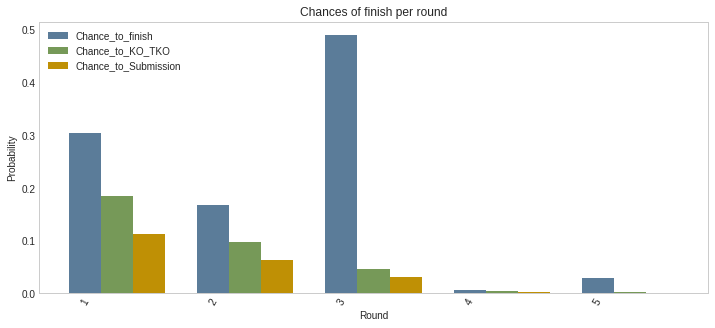

In [ ]:
df1 = df_clean.groupby('last_round', as_index=False).count()[['last_round','No_of_rounds']]
df2 = df_clean.groupby('last_round', as_index=False).sum()['win_by_KO']
df3 = df_clean.groupby('last_round', as_index=False).sum()['win_by_Submission']
finish = pd.concat([df1, df2, df3], axis=1, sort=False)
finish['Chance_to_finish'] = finish['No_of_rounds']/finish['No_of_rounds'].sum()
finish['Chance_to_KO_TKO'] = finish['win_by_KO']/finish['No_of_rounds'].sum()
finish['Chance_to_Submission'] = finish['win_by_Submission']/finish['No_of_rounds'].sum()
Chance_to_finish = finish['Chance_to_finish'].to_list()
Chance_to_KO_TKO = finish['Chance_to_KO_TKO'].to_list()
Chance_to_Submission = finish['Chance_to_Submission'].to_list()
last_round = np.array(finish['last_round'].to_list())
fig, ax = plt.subplots(figsize=(12,5))
bar_width = 0.25

ax.bar(last_round + 0.00, Chance_to_finish , width=bar_width, label = 'Chance_to_finish' , color = 'xkcd:slate blue')
ax.bar(last_round + 0.25, Chance_to_KO_TKO,  width=bar_width,label = 'Chance_to_KO_TKO', color ='xkcd:moss' )
ax.bar(last_round + 0.5, Chance_to_Submission,  width=bar_width, label = 'Chance_to_Submission', color ='xkcd:ochre' )

ax.set(title='Chances of finish per round',
       ylabel= 'Probability',
       xlabel='Round'
      )
plt.xticks(label =last_round , rotation=60)
ax.grid(False)
ax.legend(loc='upper left')

plt.show()


Last week, we understand that the chance to win by knock-out at the first round is highest, and the chance to finish reach 30%

[Text(0, 0.5, 'Takedown accuracy %'),
 Text(0.5, 0, 'Time_bout_min'),
 Text(0.5, 1.0, 'Takedown accuracy')]

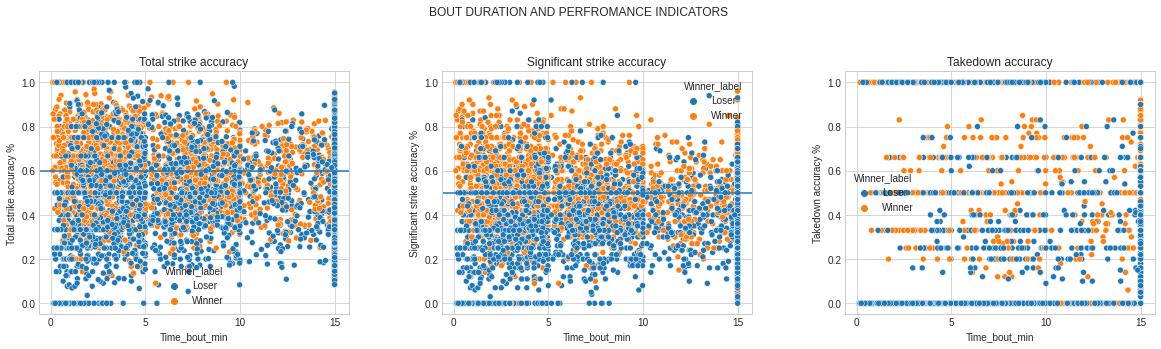

In [ ]:
import seaborn as sns
fig = plt.figure(constrained_layout=False, figsize=(20, 5))
fig.suptitle('BOUT DURATION AND PERFROMANCE INDICATORS')
gs = fig.add_gridspec(nrows=1, ncols=3,top = 0.8, wspace=0.3, hspace=0.3)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

sns.scatterplot(data=RB_fighter, y="TOTAL_STR_pct", x="total_time_min", hue="Winner_label", hue_order = ['Loser','Winner'], ax = ax1 )
ax1.set(title = 'Total strike accuracy' , xlabel = 'Time_bout_min' , ylabel = 'Total strike accuracy %' , xticks = [0,5,10,15])
ax1.axhline(y = 0.6)

sns.scatterplot(data=RB_fighter, y="SIG_STR_pct", x="total_time_min", hue="Winner_label", hue_order = ['Loser','Winner'],ax = ax2)
ax2.set(title = 'Significant strike accuracy' , xlabel = 'Time_bout_min' , ylabel = 'Significant strike accuracy %', xticks = [0,5,10,15])
ax2.axhline(y = 0.5)

sns.scatterplot(data=RB_fighter, y="TD_pct", x="total_time_min", hue="Winner_label", ax = ax3, hue_order = ['Loser','Winner'])
ax3.set(title = 'Takedown accuracy', xlabel = 'Time_bout_min' , ylabel = 'Takedown accuracy %' , xticks = [0,5,10,15])


Total Strike Accuracy, Signiﬁcant Strike Accuracy is reduced over time, and the diﬀerence between winners and losers in this performance indicator becomes less distinct (represented by a reduction in accuracy by winners,and an increase by losers). The best time to take advantage is in the first round, when the strike accuracy is still high.


On the contrary, Takedowns maintaining their frequency. This can be understand that grappling strategy from the position on the ground is prioritized over strikes during the ﬁnal minutes of a bout.

## Question 2: Significant Strike pace and accuracy

[Text(0, 0.5, 'win probability'), Text(0.5, 0, 'Significant strike per min')]

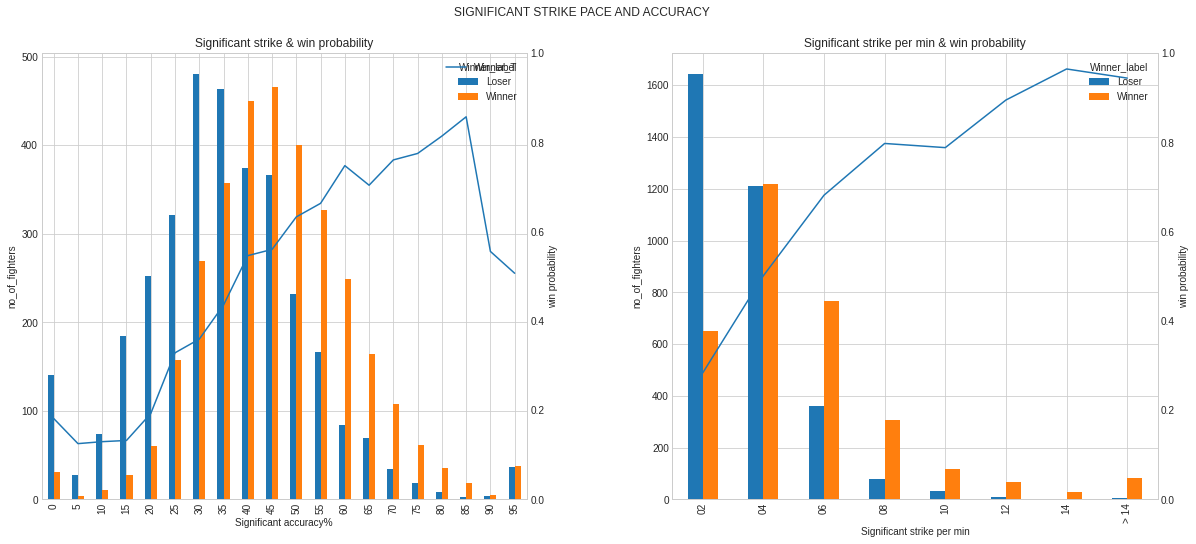

In [ ]:

fig = plt.figure(constrained_layout=False, figsize=(20, 8))
fig.suptitle('SIGNIFICANT STRIKE PACE AND ACCURACY')
gs = fig.add_gridspec(nrows=1, ncols= 2,top = 0.9, wspace=0.3, hspace=0.3)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

RB_fighter['SIG_STR_pct_label'] = pd.cut(RB_fighter["SIG_STR_pct"], bins = 20, labels = range(0,100,5))

pd.pivot_table(RB_fighter[['SIG_STR_pct_label','Winner_T', 'Winner_label']], index='SIG_STR_pct_label',columns='Winner_label',values='Winner_T',aggfunc=len).plot(kind= 'bar', ax = ax1)
ax1.set(title = 'Significant strike & win probability', xlabel = 'Significant accuracy%' , ylabel = 'no_of_fighters')

ax1 = ax1.twinx()
RB_fighter.groupby('SIG_STR_pct_label').mean()['Winner_T'].reset_index().plot( ax= ax1, grid = True, ylim = (0,1))
ax1.grid(False)
ax1.set(xlabel = 'Significant accuracy%' , ylabel = 'win probability')

RB_fighter['SIG_STR_per_min'] = RB_fighter['SIG_STR._landed']/RB_fighter['total_time_min']
RB_fighter['SIG_STR_per_min_label'] = RB_fighter['SIG_STR_per_min'].apply(lambda x: '02' if x <= 2 else ('04' if x <= 4 else('06' if x <= 6 else ('08' if x<= 8 else ('10' if x <= 10 else ('12' if x <= 12 else ('14' if x <= 14 else '> 14' )) )))))

pd.pivot_table(RB_fighter[['SIG_STR_per_min_label','Winner_T', 'Winner_label']], index='SIG_STR_per_min_label',columns='Winner_label',values='Winner_T',aggfunc=len).plot(kind= 'bar', ax = ax2)
ax2.set(title = 'Significant strike per min & win probability', xlabel = 'Significant strike per min' , ylabel = 'no_of_fighters')

ax2 = ax2.twinx()
RB_fighter.groupby('SIG_STR_per_min_label').mean()['Winner_T'].plot(ax= ax2, ylim = (0,1))
ax2.grid(False)
ax2.set(xlabel = 'Significant strike per min' , ylabel = 'win probability')
# ax2.set_xticklabels(range(2,15,2))



Significant strike obiviously bring high efficiency in a fight. Maintaining an accuracy rate above 40%, the chances of winning are higher. 
Looking deeply at the strike frequency, every minute you hit your opponent ~ 5 strikes, the win can be very close

## Question 3: Positions to take advantage of

[(0.0, 100.0),
 Text(0, 0.5, 'Distance landed'),
 (0.0, 15.0),
 Text(0.5, 0, 'Time_bout_min'),
 Text(0.5, 1.0, 'Distance strike & bout duration')]

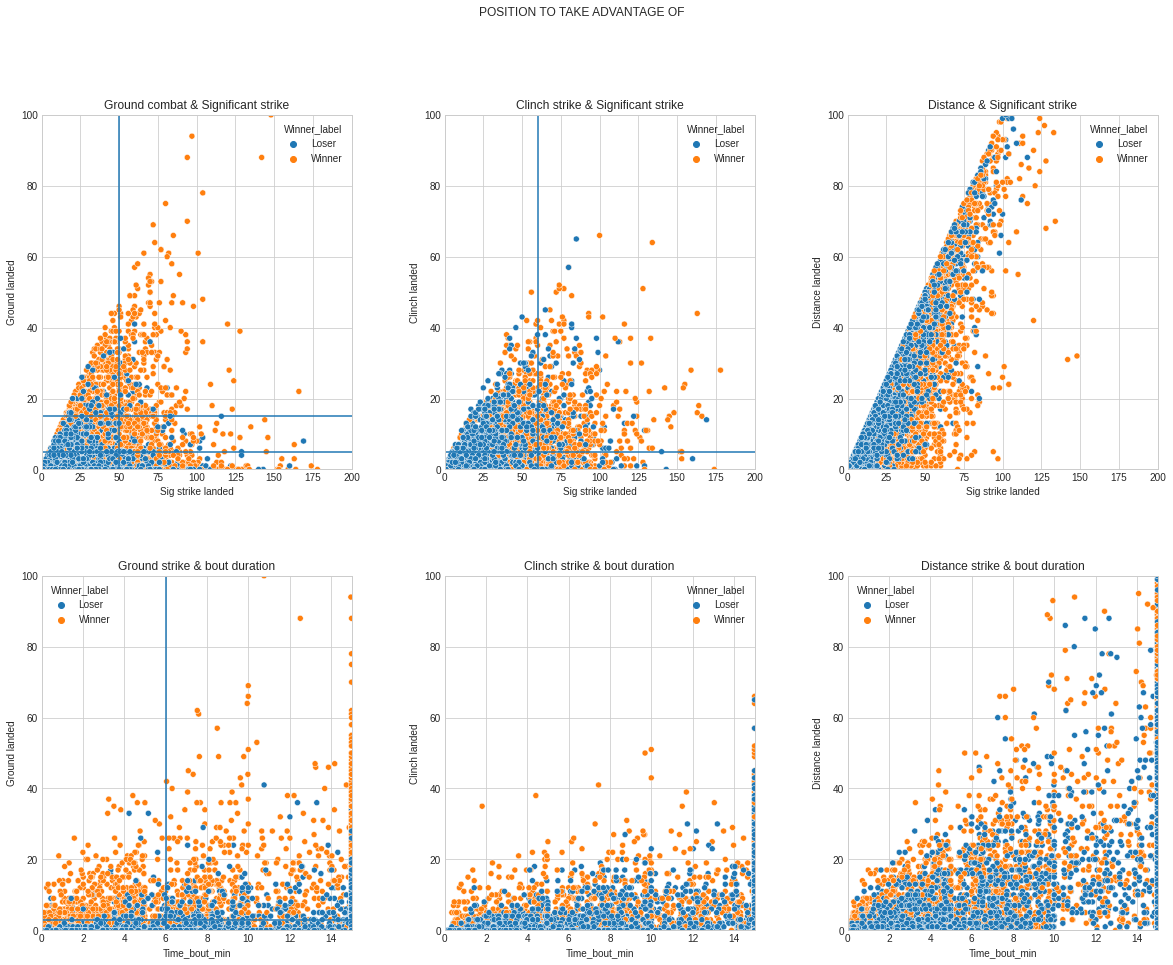

In [ ]:
fig = plt.figure(constrained_layout=False, figsize=(20, 15))
fig.suptitle('POSITION TO TAKE ADVANTAGE OF')
gs = fig.add_gridspec(nrows=2, ncols=3, wspace=0.3, hspace=0.3)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

ax4 = fig.add_subplot(gs[1, 0])
ax5 = fig.add_subplot(gs[1, 1])
ax6 = fig.add_subplot(gs[1, 2])


# sns.scatterplot(data=RB_fighter, y="GROUND_landed", x="SIG_STR._landed", hue="Winner_T", ax = ax1)
sns.scatterplot(data=RB_fighter, y="GROUND_landed", x="SIG_STR._landed", hue="Winner_label", hue_order = ['Loser','Winner'], ax = ax1 )
ax1.set(title = 'Ground combat & Significant strike', xlabel = 'Sig strike landed' , ylabel = 'Ground landed', ylim = (0,100) , xlim = (0,200) )
ax1.axhline(y = 15 , xmax= 1)
ax1.axhline(y = 5 , xmin = 0)
ax1.axvline(x = 50)

sns.scatterplot(data=RB_fighter, y="CLINCH_landed", x="SIG_STR._landed", hue="Winner_label", hue_order = ['Loser','Winner'],ax = ax2)
ax2.set(title = 'Clinch strike & Significant strike' , xlabel = 'Sig strike landed' , ylabel = 'Clinch landed', ylim = (0,100) , xlim = (0,200) )

ax2.axhline(y = 5 , xmin = 0)
ax2.axvline(x = 60)

sns.scatterplot(data=RB_fighter, y= "DISTANCE_landed" , x= "SIG_STR._landed", hue="Winner_label", ax = ax3, hue_order = ['Loser','Winner'])
ax3.set(title = 'Distance & Significant strike', xlabel = 'Sig strike landed' , ylabel = 'Distance landed', ylim = (0,100) , xlim = (0,200) )


sns.scatterplot(data=RB_fighter, y="GROUND_landed", x="total_time_min", hue="Winner_label", hue_order = ['Loser','Winner'], ax = ax4 )
ax4.set(title = 'Ground strike & bout duration' , xlabel = 'Time_bout_min' , ylabel = 'Ground landed', ylim = (0,100) , xlim = (0,15) )
ax4.axhline(y = 3 , xmin = 0)
ax4.axvline(x = 6)


sns.scatterplot(data=RB_fighter, y="CLINCH_landed", x="total_time_min", hue="Winner_label", hue_order = ['Loser','Winner'],ax = ax5)
ax5.set(title = 'Clinch strike & bout duration' , xlabel = 'Time_bout_min' , ylabel = 'Clinch landed', ylim = (0,100) , xlim = (0,15) )

sns.scatterplot(data=RB_fighter, y= "DISTANCE_landed" , x= "total_time_min", hue="Winner_label", ax = ax6, hue_order = ['Loser','Winner'])
ax6.set(title = 'Distance strike & bout duration' , xlabel = 'Time_bout_min' , ylabel = 'Distance landed', ylim = (0,100) , xlim = (0,15) )



Most of the time fighters will strike at long distance, and the significant strikes to win is when they strike the opponent down to the ground

The threshold can be observed and selected from the winning results as follows:


*   Significant strikes >= 50 & Ground strike >= 5 or Ground strike >= 15
*   Ground strike >= 3 within 6 minutes
*   Significant strikes >= 60 & Clinch strike >= 5

In [ ]:
RB_fighter['Sig_str_ground'] = (RB_fighter['SIG_STR._landed'] >= 50) & (RB_fighter['GROUND_landed'] >= 5) | (RB_fighter['GROUND_landed'] >=15)

RB_fighter['Ground_time'] = (RB_fighter['GROUND_landed'] >= 3) & (RB_fighter['total_time_min'] <= 6)
RB_fighter['Sig_str_clinch'] = (RB_fighter['SIG_STR._landed'] >= 60) & (RB_fighter['GROUND_landed'] >= 5)

print(RB_fighter.groupby('Sig_str_ground').mean()['Winner_T'].reset_index())
print(RB_fighter.groupby('Ground_time').mean()['Winner_T'].reset_index())
print(RB_fighter.groupby('Sig_str_clinch').mean()['Winner_T'].reset_index())

   Sig_str_ground  Winner_T
0           False  0.431366
1            True  0.853992
   Ground_time  Winner_T
0        False  0.455093
1         True  0.867672
   Sig_str_clinch  Winner_T
0           False  0.472908
1            True  0.855030


## Summary




*   Speed up the fight right from the first round, finish as soon as possible

*   6 significant strikes per min

*   Accuracy of landing should be more than 40%

*   Trying to get closer after continuous attacks that knock the opponent to the floor(> = 50 sig strike + >= 5 ground strikes)

*   Within the first 6 minutes, it's great when strike or take down the opponents to the floor

*   At close distance, the clinch can also be used to keep the rhythm of the game until the end of the match


